In [1]:
import sys

sys.path.append("../")

In [2]:
import cheetah
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from gymnasium import spaces
from gymnasium.wrappers import RescaleAction
from stable_baselines3.common.env_checker import check_env

from compare.simon_gpmpc.environment import e_trajectory_simENV
from src.environments.awake_e_steering import AwakeESteering
from src.wrappers import RescaleObservation

In [3]:
old_env = e_trajectory_simENV()

new_env = AwakeESteering(max_steerer_delta=1e-4)
wrapped_new_env = RescaleAction(new_env, -1, 1)
wrapped_new_env = RescaleObservation(
    wrapped_new_env, -1, 1, assumed_space=spaces.Box(-1e-2, 1e-2, shape=(10,))
)

shift 1.0
shift 1.0


In [4]:
check_env(old_env)

shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step..

In [5]:
check_env(wrapped_new_env)

In [6]:
old_env.action_space

Box(-1.0, 1.0, (10,), float32)

In [7]:
new_env.action_space

Box(-1e-04, 1e-04, (10,), float32)

In [8]:
wrapped_new_env.action_space

Box(-1.0, 1.0, (10,), float32)

In [9]:
old_env.observation_space

Box([-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.], 1.0, (11,), float32)

In [10]:
new_env.observation_space

Box(-inf, inf, (10,), float32)

In [11]:
wrapped_new_env.observation_space

Box(-inf, inf, (10,), float32)

In [12]:
old_env.reset()

shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  


(array([-0.00101055, -0.00077833, -0.06978972, -0.10947198, -0.14453553,
         0.2091602 ,  0.4389385 ,  0.35249248,  0.27771214,  0.2697314 ,
         0.        ], dtype=float32),
 {})

In [13]:
new_env.reset()

(array([-2.9993067e-05,  2.5186588e-05,  2.1391823e-04,  4.6425220e-04,
         1.2302187e-03, -1.4697369e-03, -3.2092016e-03, -2.4616159e-03,
        -1.4774324e-03, -7.3869969e-04], dtype=float32),
 {'backend_info': {'incoming_beam': array([1.9006870e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 1.1597413e-03, 2.3194827e-04, 1.1597413e-03,
          2.3194827e-04, 1.0000000e-06, 1.0000000e-06], dtype=float32),
   'quadrupole_settings': array([ -5.085799,   9.504011,  -8.240125, -31.725054,  19.703522,
          -31.725054,  -7.92377 ,  26.87176 ,  -1.07907 ,  16.7789  ,
          -14.029   ], dtype=float32)}})

In [14]:
wrapped_new_env.reset()

(array([-0.00712013, -0.02255058, -0.04210907, -0.07409889, -0.17764318,
         0.22033823,  0.48028922,  0.3756255 ,  0.24851918,  0.17551506],
       dtype=float32),
 {'backend_info': {'incoming_beam': array([1.9006870e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 1.1597413e-03, 2.3194827e-04, 1.1597413e-03,
          2.3194827e-04, 1.0000000e-06, 1.0000000e-06], dtype=float32),
   'quadrupole_settings': array([ -5.085799,   9.504011,  -8.240125, -31.725054,  19.703522,
          -31.725054,  -7.92377 ,  26.87176 ,  -1.07907 ,  16.7789  ,
          -14.029   ], dtype=float32)}})

In [15]:
%%timeit
_, _ = old_env.reset()

shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
213 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
_, _ = wrapped_new_env.reset()

7.05 ms ± 29.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%%timeit
_, _, _, _, _ = old_env.step(old_env.action_space.sample())

step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...ste

In [18]:
%%timeit
_, _, _, _, _ = wrapped_new_env.step(wrapped_new_env.action_space.sample())

7.31 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
shift 1.0
************* reset  ************* reset  ************* reset 

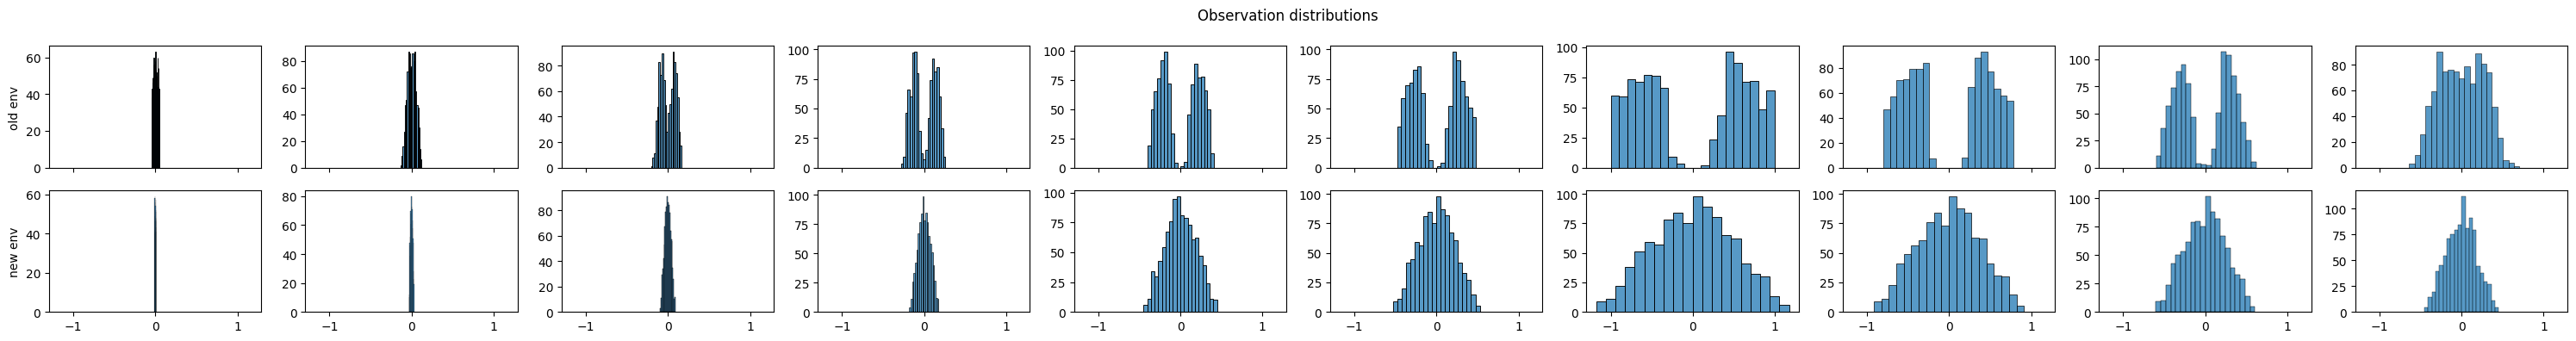

In [19]:
old_env_observations = []
new_env_observations = []
for _ in range(1_000):
    old_env_observations.append(old_env.reset()[0])
    new_env_observations.append(wrapped_new_env.reset()[0])

old_env_observations = np.array(old_env_observations)
new_env_observations = np.array(new_env_observations)

fig, axs = plt.subplots(2, 10, figsize=(30, 4), sharex=True)
for i in range(10):
    sns.histplot(old_env_observations[:, i], ax=axs[0, i], bins=20)
    sns.histplot(new_env_observations[:, i], ax=axs[1, i], bins=20)
    axs[0, i].set_ylabel(None)
    axs[1, i].set_ylabel(None)
axs[0, 0].set_ylabel("old env")
axs[1, 0].set_ylabel("new env")
fig.suptitle("Observation distributions")
plt.tight_layout()
plt.show()

shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...ste

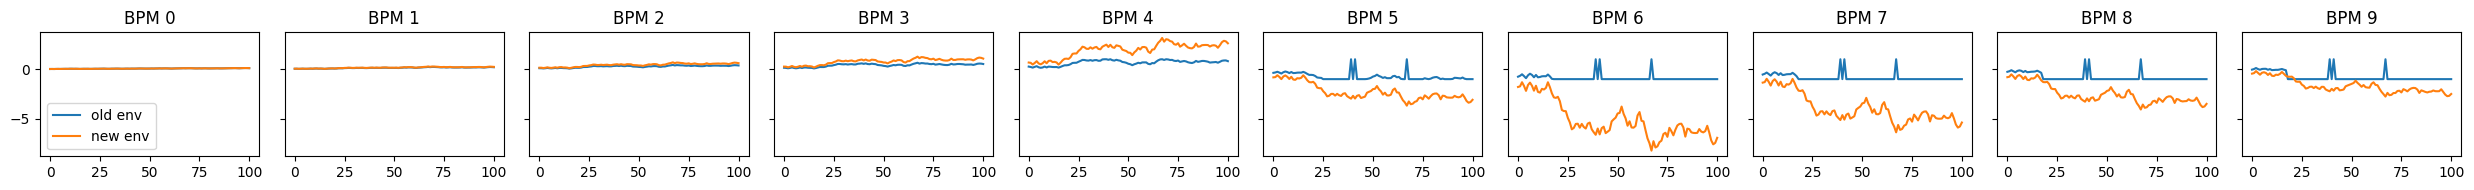

In [20]:
old_observations = []
new_observations = []

observation, info = old_env.reset()
old_observations.append(observation)

observation, info = wrapped_new_env.reset(options={"magnet_init": old_env.kicks_0})
new_observations.append(observation)

for _ in range(100):
    action = old_env.action_space.sample()

    observation, reward, terminated, truncated, info = old_env.step(action)
    old_observations.append(observation)

    observation, reward, terminated, truncated, info = wrapped_new_env.step(action)
    new_observations.append(observation)

old_observations = np.array(old_observations)
new_observations = np.array(new_observations)

fig, axs = plt.subplots(1, 10, figsize=(25, 2), sharex=True, sharey=True)
for i in range(10):
    axs[i].plot(old_observations[:, i], label="old env")
    axs[i].plot(new_observations[:, i], label="new env")
    axs[i].set_title(f"BPM {i}")
axs[0].legend()
plt.tight_layout()
plt.show()

shift 1.0
************* reset  ************* reset  ************* reset  ************* reset  ************* reset  
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...
shift 1.0
step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...step...ste

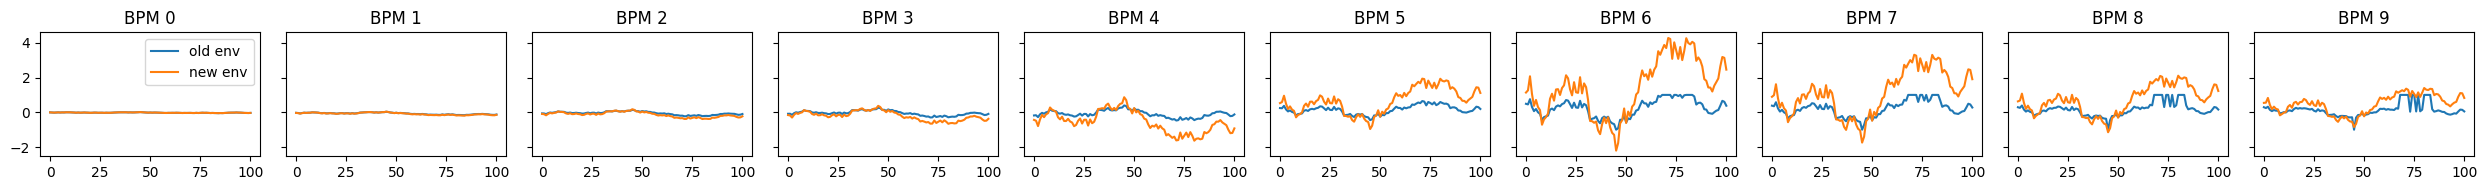

In [21]:
old_observations = []
new_observations = []

observation, info = old_env.reset()
old_observations.append(observation)

observation, info = wrapped_new_env.reset(options={"magnet_init": old_env.kicks_0})
new_observations.append(observation)

for _ in range(100):
    action = wrapped_new_env.action_space.sample()

    observation, reward, terminated, truncated, info = old_env.step(action)
    old_observations.append(observation)

    observation, reward, terminated, truncated, info = wrapped_new_env.step(action)
    new_observations.append(observation)

old_observations = np.array(old_observations)
new_observations = np.array(new_observations)

fig, axs = plt.subplots(1, 10, figsize=(25, 2), sharex=True, sharey=True)
for i in range(10):
    axs[i].plot(old_observations[:, i], label="old env")
    axs[i].plot(new_observations[:, i], label="new env")
    axs[i].set_title(f"BPM {i}")
axs[0].legend()
plt.tight_layout()
plt.show()